### Vegetable Classification 

Uses following study: https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study

link to dataset: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import os
import tensorflow as tf
import pathlib
import glob
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
pwd = os.getcwd()
train_dir = str(pwd) + '\\Vegetable Images\\train'
val_dir = str(pwd) + '\\Vegetable Images\\validation'
test_dir = str(pwd) + '\\Vegetable Images\\test'

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(train_dir),
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15000 files belonging to 15 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(val_dir),
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 15 classes.


In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  pathlib.Path(test_dir),
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 15 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


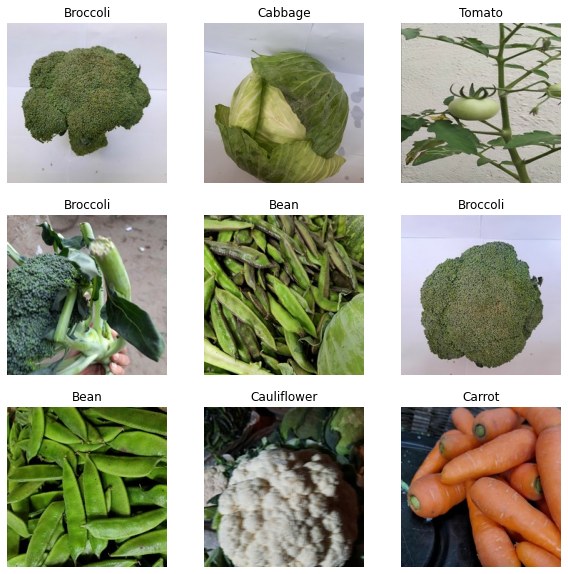

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [13]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
469/469 [==============================] - 301s 640ms/step - loss: 1.1408 - accuracy: 0.6377 - val_loss: 0.5124 - val_accuracy: 0.8397
Epoch 2/10
469/469 [==============================] - 317s 676ms/step - loss: 0.3245 - accuracy: 0.9007 - val_loss: 0.4144 - val_accuracy: 0.8823
Epoch 3/10
469/469 [==============================] - 294s 626ms/step - loss: 0.1632 - accuracy: 0.9507 - val_loss: 0.3011 - val_accuracy: 0.9137
Epoch 4/10
469/469 [==============================] - 290s 619ms/step - loss: 0.0964 - accuracy: 0.9701 - val_loss: 0.1996 - val_accuracy: 0.9473
Epoch 5/10
469/469 [==============================] - 289s 616ms/step - loss: 0.0643 - accuracy: 0.9807 - val_loss: 0.3902 - val_accuracy: 0.9080
Epoch 6/10
469/469 [==============================] - 288s 614ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.2531 - val_accuracy: 0.9370
Epoch 7/10
469/469 [==============================] - 284s 606ms/step - loss: 0.0434 - accuracy: 0.9874 - val_loss: 0.3645 -

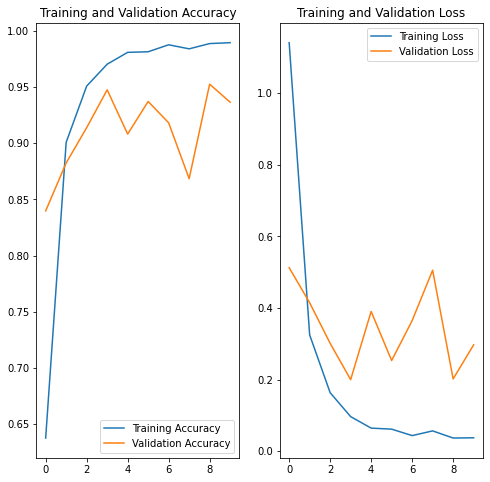

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
import random
vegetables = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

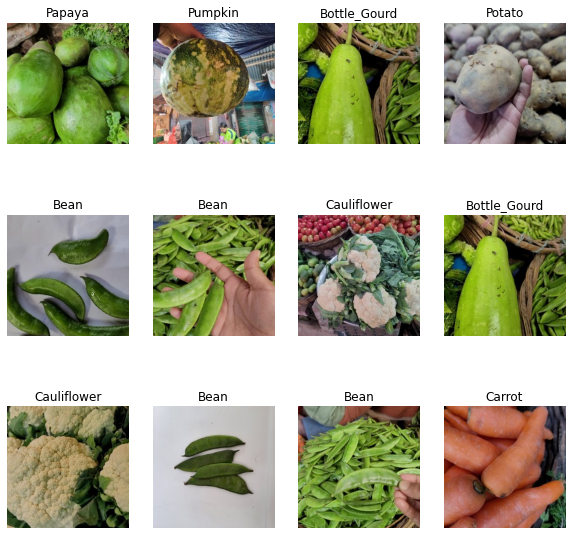

In [49]:
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    choice = random.choice(vegetables)
    files = glob.glob(str(pwd)+"\\Vegetable Images\\test\\"+choice+"\\*.jpg")
    img_dir = files[random.randrange(0,len(files),1)]
    data = image.imread(img_dir)
    plt.imshow(data)
    img = tf.keras.utils.load_img(
    img_dir, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    label = class_names[np.argmax(score)]

    plt.title(label)
    plt.axis("off")

In [50]:
model_dir = str(pwd) + '\\Model'
model.save(model_dir)

INFO:tensorflow:Assets written to: C:\Users\josh.dykstra\Desktop\Jupyter Notebooks\Vegetables\Model\assets
